In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [118]:
def GenerateData(c1, r1, c2, r2, N):
    
    X = []
    Y = []
    
    for i in range(N):
        r_1 = np.random.uniform(0, r1)
        theta = np.random.uniform(0, 2*np.pi)
        x1 = c1 + r_1 * np.array([np.cos(theta), np.sin(theta)])
        X.append(x1)
        Y.append(1)
        
        r_2 = np.random.uniform(r1, r2)
        theta = np.random.uniform(0, 2*np.pi)
        x2 = c2 + r_2 * np.array([np.cos(theta), np.sin(theta)])
        X.append(x2)
        Y.append(0)
        
    X = np.array(X)
    Y = np.array(Y)
    Y = Y.reshape((len(Y),1))
        
    return X, Y

X, Y = GenerateData(0, 1, 0, 2, 2000)
print(X.shape)
print(Y.shape)

(4000, 2)
(4000, 1)


In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

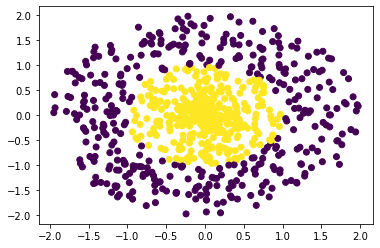

In [120]:
def PlotData(X, Y):
    plt.scatter(X[:,0], X[:,1], c = Y)

PlotData(X_test, Y_test)

In [121]:
def TransformFeatures(X):
    transformed_X = np.zeros((len(X), 6))
    
    transformed_X[:,0] = X[:,0]
    transformed_X[:,1] = X[:,1]
    transformed_X[:,2] = X[:,0]**2
    transformed_X[:,3] = X[:,1]**2
    transformed_X[:,4] = X[:,0]*X[:,1]
    transformed_X[:,5] = np.ones((len(X)))
    
    return transformed_X

transformed_X_train = TransformFeatures(X_train)

In [122]:
def Probability(Z):
    return 1.0/(1 + np.exp(-Z))

In [123]:
def ComputeLogit(X, W):
    return np.dot(X, W)

In [124]:
def Forward(X, W):
    transformed_X = TransformFeatures(X)
    Z = ComputeLogit(transformed_X, W)
    prediction = Probability(Z)
    
    return prediction

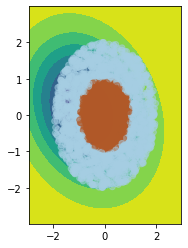

In [125]:
W = np.random.rand(6,1)

def Visualize(X, Y, W):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    points =np.c_[xx.ravel(), yy.ravel()]
    Probability = Forward(TransformFeatures(points), W)
    Probability = Probability.reshape(xx.shape)
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Probability,alpha=1)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, alpha=0.5)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

Visualize(X_train, Y_train,W)

In [126]:
def ComputeLoss(X, Y, W):
    transformed_X = TransformFeatures(X)
    Z = ComputeLogit(transformed_X, W)
    prediction = Probability(Z)
    loss = -np.sum(Y * np.log(prediction) + (1 - Y) * np.log(1 - prediction))/(Y.shape[0])
    
    return loss

In [127]:
def ComputeGradient(X, prediction, Y):
    transformed_X = TransformFeatures(X)
    dW = np.average(transformed_X * (prediction - Y), axis=0)
    dW = dW.reshape((dW.shape[0],1))
    
    return dW

In [141]:
def SelectBatch(X, Y, indexes):
    
    X_batch = []
    Y_batch = []
    
    for i in indexes:
        X_batch.append(X[i])
        Y_batch.append(Y[i])
    
    return np.array(X_batch), np.array(Y_batch)

In [142]:
def Train(X, Y, W, num_epochs, batch_size, learning_rate = 0.01):
    Loss = []
    for epoch in range(num_epochs):
        loss = ComputeLoss(X, Y, W)
        Loss.append(loss)
       
        indexes = np.random.choice(X.shape[0], batch_size)

        X_batch, Y_batch = SelectBatch(X, Y, indexes)
        prediction = Forward(X_batch, W)

        dW = ComputeGradient(X_batch, prediction, Y_batch)
        W = W - learning_rate * dW
    
    return Loss, W

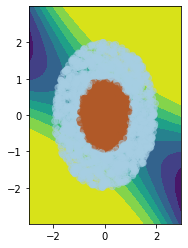

In [167]:
W = np.random.rand(6,1)
Visualize(X_train, Y_train ,W)

In [168]:
Loss, W = Train(X_train, Y_train, W, 1000, 1, 0.1)

In [169]:
def Accuracy(X, Y, W):
    
    prediction = Forward(X, W)
    prediction[prediction < 0.5] = 0
    prediction[prediction >=0.5] = 1
    
    overlap = np.zeros_like(prediction)
    overlap[prediction == Y] = 1
    
    accuracy = np.sum(overlap)/len(overlap)
    
    return accuracy
    

train_acc = Accuracy(X_train, Y_train, W)
print("Train_acc = ", train_acc)

test_acc = Accuracy(X_test, Y_test, W)
print("Test_acc = ", test_acc)

Train_acc =  0.9928125
Test_acc =  0.99375


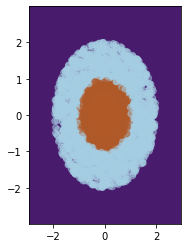

In [170]:
Visualize(X, Y, W)

Text(0, 0.5, 'Loss')

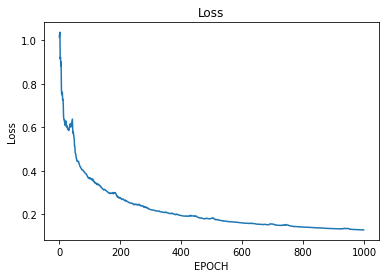

In [171]:
plt.plot(Loss)
plt.title('Loss')
plt.xlabel('EPOCH')
plt.ylabel('Loss')